In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')

In [3]:
train_fraud_counts = train_data['is_fraud'].value_counts()

# Value counts for the "fraud" column in the test set
test_fraud_counts = test_data['is_fraud'].value_counts()

print("Training Set - Fraud Value Counts:")
print(train_fraud_counts)

print("\nTest Set - Fraud Value Counts:")
print(test_fraud_counts)

Training Set - Fraud Value Counts:
is_fraud
0    1289169
1       7506
Name: count, dtype: int64

Test Set - Fraud Value Counts:
is_fraud
0    553574
1      2145
Name: count, dtype: int64


In [4]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [5]:
test_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [6]:
drop_columns = ['merchant', 'cc_num', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'trans_num', 'lat', 'long', 'merch_lat', 'merch_long']
train_data.drop(drop_columns, axis = 1, inplace = True)
test_data.drop(drop_columns, axis = 1, inplace = True)

In [7]:
train_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
test_data.drop('Unnamed: 0', axis = 1, inplace = True)
test_data.head()

,trans_date_trans_time,amt,zip,city_pop,dob,unix_time,is_fraud
0,2020-06-21 12:14:25,2.86,29209,333497,1968-03-19,1371816865,0
1,2020-06-21 12:14:33,29.84,84002,302,1990-01-17,1371816873,0
2,2020-06-21 12:14:53,41.28,11710,34496,1970-10-21,1371816893,0
3,2020-06-21 12:15:15,60.05,32780,54767,1987-07-25,1371816915,0
4,2020-06-21 12:15:17,3.19,49632,1126,1955-07-06,1371816917,0


In [9]:
# Converting date columns to datetime
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
train_data['dob'] = pd.to_datetime(train_data['dob'])

# Calculating age in days by subtracting 'dob' from 'trans_date_trans_time'
train_data['age_days'] = (train_data['trans_date_trans_time'] - train_data['dob']).dt.days

# Converting age in days to years and round it to the nearest integer
train_data['age_years'] = (train_data['age_days'] / 365).round().astype(int)

# Deleting unnecessary columns
drop_columns = ['trans_date_trans_time', 'age_days', 'dob']
train_data.drop(columns=drop_columns, inplace=True)

# Converting date columns to datetime
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])
test_data['dob'] = pd.to_datetime(test_data['dob'])

# Calculating age in days by subtracting 'dob' from 'trans_date_trans_time'
test_data['age_days'] = (test_data['trans_date_trans_time'] - test_data['dob']).dt.days

# Converting age in days to years and round it to the nearest integer
test_data['age_years'] = (test_data['age_days'] / 365).round().astype(int)

# Deleting unnecessary columns
drop_columns = ['trans_date_trans_time', 'age_days', 'dob']
test_data.drop(columns=drop_columns, inplace=True)
test_data.head()

,amt,zip,city_pop,unix_time,is_fraud,age_years
0,2.86,29209,333497,1371816865,0,52
1,29.84,84002,302,1371816873,0,30
2,41.28,11710,34496,1371816893,0,50
3,60.05,32780,54767,1371816915,0,33
4,3.19,49632,1126,1371816917,0,65


In [10]:
# Separate features and labels
X_train = train_data.drop(columns=['is_fraud'])
y_train = train_data['is_fraud']

X_test = test_data.drop(columns=['is_fraud'])
y_test = test_data['is_fraud']

**Over-Sampling the imbalanced data**

In [11]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

In [12]:
print(pd.Series(y_train_resampled).value_counts())

is_fraud
0    1289169
1    1289169
Name: count, dtype: int64


# **Applying Logistic Regression Model**

In [13]:
from sklearn.linear_model import LogisticRegression

# Create and train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

In [14]:
print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1 Score: {lr_f1}")

Logistic Regression Metrics:
Accuracy: 0.8616998878929819
Precision: 0.0027686450943069734
Recall: 0.09696969696969697
F1 Score: 0.0053835800807537


# **Applying Random Forest Classifier Model(Ensemble Method)**

In [15]:
from sklearn.ensemble import RandomForestClassifier

# Create and train a Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Random Forest Metrics:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")

Random Forest Metrics:
Accuracy: 0.9960177715716036
Precision: 0.027777777777777776
Recall: 0.0009324009324009324
F1 Score: 0.0018042399639152005


# **Applying Decision Tree Classifier**

In [16]:
from sklearn.tree import DecisionTreeClassifier

# Create and train a Decision Trees model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the Decision Trees model
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("Decision Trees Metrics:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")

Decision Trees Metrics:
Accuracy: 0.9938961957392135
Precision: 0.014029618082618862
Recall: 0.008391608391608392
F1 Score: 0.010501750291715286


**Over-Sampling using SMOTE** 

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Apply SMOTE to the training data
X_resampled_again, y_resampled_again= smote.fit_resample(X_train, y_train)

In [18]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_resampled_again, y_resampled_again)
dt_predictions = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

print("Decision Trees Metrics after SMOTE:")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall}")
print(f"F1 Score: {dt_f1}")

Decision Trees Metrics after SMOTE:
Accuracy: 0.9690311110471299
Precision: 0.00668020171589495
Recall: 0.04755244755244755
F1 Score: 0.011714712300447915


In [19]:
# Training and evaluating the Random Forest model with SMOTE
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_resampled_again, y_resampled_again)
rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("\nRandom Forest Metrics after SMOTE:")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1 Score: {rf_f1}")


Random Forest Metrics after SMOTE:
Accuracy: 0.9937612354445322
Precision: 0.10794780545670225
Recall: 0.08484848484848485
F1 Score: 0.09501435656486558


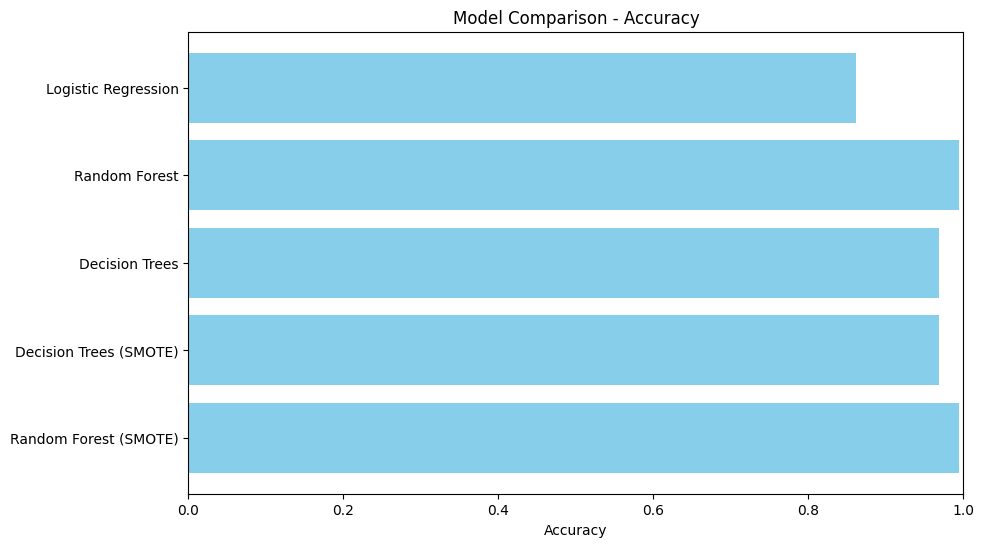

In [20]:
# Comparing the accuracies of the models
import matplotlib.pyplot as plt

# Defining model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'Decision Trees', 'Decision Trees (SMOTE)', 'Random Forest (SMOTE)']
accuracies = [lr_accuracy, rf_accuracy, dt_accuracy, dt_accuracy, rf_accuracy]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.xlim(0.0, 1.0) 
plt.gca().invert_yaxis()  
plt.show()
